# UCZENIE MASZYNOWE
## Problem Titanica

Celem poniższego programu jest przedstawienie metodyki przy rozwiązywaniu problemów z dziedziny uczenia maszynowego. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

train_data = pd.read_csv('./data/train.csv')
test_data  = pd.read_csv('./data/test.csv')


### Problem:

Zadaniem jest znalezienie modelu, który będzie w stanie w jak najdokładniejszy sposób przewidzieć, kto przeżyje, a kto zginie w trakcie katastrofy. Wybrany model w pierwszej kolejności należy nauczyć, wykorzystując do tego tzw. *train set*, czyli zestaw danych, który posiada zarówno zestaw cech jak i rezultat (w naszym przypadku śmiertelność). Tak nauczony model zostanie dopiero wykorzystany do próby przewidzenia rezultatów zestawu danych posiadających wyłącznie cechy.

### Zestaw uczący:

In [3]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Zestaw testowy:

In [4]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

Jak widać na powyższych tabelach, dany pasażer jest opisany różnymi cechami. Poniżej opis każdej z nich:

|    Cecha |                                   Znaczenie |
|---------:|--------------------------------------------:|
| survival |                   czy dany pasażer przeżył? |
|   pclass |              jaką klasą podróżował pasażer? |
|      sex |                                        płeć |
|      age |                                        wiek |
|    sibsp |        ilość krewnych pasażera na pokładzie |
|    parch | ilość rodziców/dzieci pasażera na pokładzie |
|   ticket |                                numer biletu |
|     fare |                                      opłata |
|    cabin |                                numer pokoju |
| embarked |             port z jakiego pasażer wyruszył |

### Znaczenie danych cech w aspekcie śmiertelności

Poszczególne cechy mogą mieć różny stopień wpływu na rezultat. Warto dlatego przyjrzeć się wstępnie w jaki sposób dana wyodrębniona cecha wpływa na śmiertelność.

Text(0, 0.5, 'Survival rate [-]')

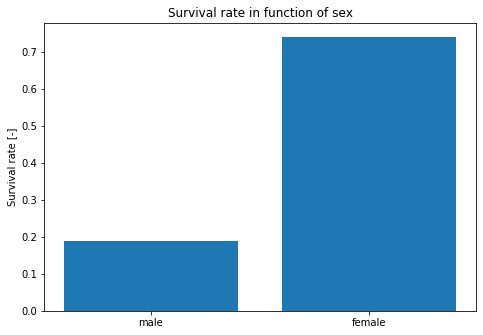

In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

rate_sex = [rate_men,rate_women]

labels = ['male','female']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, rate_sex)
ax.set_title('Survival rate in function of sex')
ax.set_ylabel('Survival rate [-]')

Text(0, 0.5, 'Survival rate [-]')

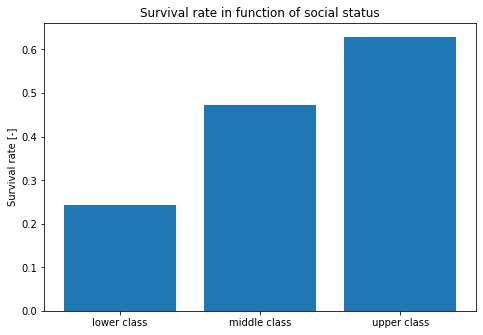

In [6]:
class3 = train_data.loc[train_data.Pclass == 3]["Survived"]
class2 = train_data.loc[train_data.Pclass == 2]["Survived"]
class1 = train_data.loc[train_data.Pclass == 1]["Survived"]

rate_class3 = sum(class3)/len(class3)
rate_class2 = sum(class2)/len(class2)
rate_class1 = sum(class1)/len(class1)

rate_class = [rate_class3,rate_class2,rate_class1]
labels = ['lower class','middle class', 'upper class']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, rate_class)
ax.set_title('Survival rate in function of social status')
ax.set_ylabel('Survival rate [-]')

Text(0, 0.5, 'Survival rate [-]')

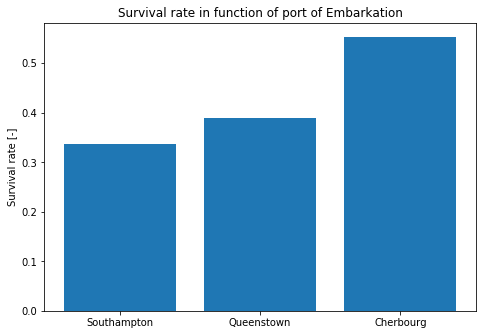

In [7]:
embarkS = train_data.loc[train_data.Embarked == 'S']["Survived"]
embarkQ = train_data.loc[train_data.Embarked == 'Q']["Survived"]
embarkC = train_data.loc[train_data.Embarked == 'C']["Survived"]

rate_S = sum(embarkS)/len(embarkS)
rate_Q = sum(embarkQ)/len(embarkQ)
rate_C = sum(embarkC)/len(embarkC)

rate_embark = [rate_S,rate_Q,rate_C]
labels = ['Southampton','Queenstown', 'Cherbourg']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, rate_embark)
ax.set_title('Survival rate in function of port of Embarkation')
ax.set_ylabel('Survival rate [-]')

Text(0, 0.5, 'Survival rate [-]')

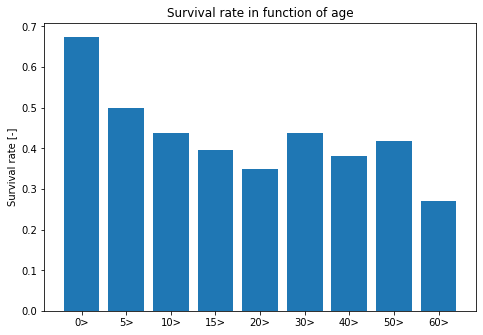

In [8]:
age_bins =  [0, 5, 10, 15, 20, 30, 40, 50, 60, 100]

rate_ages = [];

for i in range(0,len(age_bins) - 1):
    temp = (train_data.loc[(train_data.Age >= age_bins[i]) & (train_data.Age < age_bins[i+1])]["Survived"])
    rate_ages.append(sum(temp)/len(temp))

labels = age_bins[0:(len(age_bins) - 1)]

labels = [str(x) for x in labels] 

labels = [label + ">" for label in labels]
 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar( labels ,rate_ages)
ax.set_title('Survival rate in function of age')
ax.set_ylabel('Survival rate [-]')



### Wniosek:
Z powyższych wykresów słupkowych, wynika że wszystkie **analizowane** cechy mają widoczny wpływ na śmiertelność. Można zauważyć, że mężczyźni mieli drastycznie mniejsze szanse na przeżycie niżeli kobiety. Podobnie dzieci z większym prawdopodobieństwem przeżywały katastrofę. Co ciekawe widoczny wpływ miał również status społeczny reprezentowany przez klasę biletu.

### Uzupełnienie brakujących danych o wieku

W celu zastosowania danej cechy do uczenia naszego modelu, dane odpowiadające owej cesze muszą być kompletne. Chcąc wziąć pod uwagę wiek w trakcie modelowania, należy uzupełnić brakujące dane. Jako punkt odniesienia obrałem poziom społeczny oraz płeć danego pasażera. Podzieliłem według tych kryteriów **cały** zestaw danych wraz z testowym i obliczyłem dla każdego z podzestawów medianę wieku. Następnie na podstawie uzyskanych rezultatów, wypełniłem brakujące komórki.

In [9]:
# Połącz zestaw uczący oraz testowy
part1 = train_data.copy()
part2 = test_data.copy()
part1.drop(['Survived'],  1, inplace=True)
combined = part1.append(part2)
combined.reset_index(inplace=True)
combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
combined_data = combined

In [10]:
# Wylicz mediane dla mężczyzn oraz kobiet w danej klasie społecznej
#upper,middle,lower
m_c_age_median = []
for i in range(1,4):
    temp = combined_data.loc[(combined_data.Pclass == i)  & (combined_data.Sex == 'male')]
    temp = temp['Age'].values
    m_c_age_median.append(np.median(temp[~np.isnan(temp)]))


f_c_age_median = []
for i in range(1,4):
    temp = combined_data.loc[(combined_data.Pclass == i) & (combined_data.Sex == 'female')]
    temp = temp['Age'].values
    f_c_age_median.append(np.median(temp[~np.isnan(temp)]))
    
# Przy okazji uzupełniam brakujące elementy dotyczące opłaty - tym razem wykorzystuje metodę biblioteki panda
test_data.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)


In [11]:
# Uzupełnij luki w danych
def guess_age(sex,status):
    
    if sex == 'male':
        return m_c_age_median[status-1]
    
    if sex == 'female':
        return f_c_age_median[status-1]
    
for index, row in combined_data.iterrows():
    if np.isnan(row['Age']):
        combined_data.loc[index, 'Age'] = guess_age(row['Sex'],row['Pclass'])
      

In [12]:
# Zaktualizuj zestaw uczący oraz testowy o nowe dane
train_data_new = combined_data.iloc[:891]
train_data_ages = train_data_new['Age'].values
test_data_new = combined_data.iloc[891:]
test_data_ages = test_data_new['Age'].values

train_data['Age'] = train_data_ages
test_data['Age'] = test_data_ages

### Wykorzystane cechy

Na podstawie wcześniejszych analiz oraz *dostępności* poszczególnych cech (niektóre cechy np. pokoje pasażerów są trudniejsze do wypełnienia) wybrałem zestaw cech: Pclass, Sex, SibSp, Parch, Age, Embarked.

### Random Forest
Jako pierwszy model zastosowałem poznany wcześniej model **Random Forest**, opierający się na wykorzystywaniu wielu drzew decyzyjnych. Rezultat końcowy (decyzja, predykcja) jest średnią predykcji całego lasu. W celu uzyskania lepszych efektów, podjęta została próba dobrania optymalnych parametrów losowego lasu - jego rozmiaru oraz *wysokości* poszczególnych drzew. Zestaw uczący został zatem podzielony na dwa podzestawy - jeden służył uczeniu, a drugi walidacji uzyskanego modelu. W taki sposób uzyskałem *optymalny* las. Niestety co ciekawe okazało się, że odnalezione parametry, mimo minimalizacji błędu dopasowania zestawu testowego, uzyskują gorsze efekty na **właściwym** zestawie testowym niż las o parametrach, wydawałoby się przypadkowych. Świadczy to o dużej istotności rozmiaru danych uczących - nasz las był optymalny dla połowy zestawu uczącego, lecz globalnie już nie.

In [13]:
# Podział na podzestawy
splitted = np.array_split(train_data, 2)

fake_train_data = splitted[0]
fake_test_data  = splitted[1]

# Dobór cech 
features = ["Pclass", "Sex", "SibSp", "Parch", "Age","Embarked"]

y=fake_train_data["Survived"]
expected = fake_test_data["Survived"].values
X = pd.get_dummies(fake_train_data[features])
X_test = pd.get_dummies(fake_test_data[features])

# Przeprowadzenie eksperymentu mającego na celu znalezienie lasu odpowiadającego najmniejszemu błędowi MSE dopasowania

trees_numbers = np.arange(1, 650, 50).tolist()
depths = np.arange(1, 10, 1).tolist()

min_mse = 100000;

for trees_number in trees_numbers:
    for depth in depths:
        RandomForest = RandomForestClassifier(n_estimators=trees_number, max_depth=depth, random_state=1)
        RandomForest.fit(X, y)
        predictions = RandomForest.predict(X_test)
        mse = sum((predictions - expected)**2)
        if mse < min_mse:
            min_mse = mse
            best_depth = depth
            best_trees_number = trees_number

print(best_trees_number)
print(best_depth)



51
6


In [14]:
# Przeprowadź proces uczenia dla 'optymalnego' lasu

y = train_data["Survived"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

RandomForest = RandomForestClassifier(n_estimators=best_trees_number, max_depth=best_depth, random_state=1)
RandomForest.fit(X, y)
predictions = RandomForest.predict(X_test)


### Hyperparameter Tuning

Bardzej ambitnym sposobem doboru parametrów modelu jest wykorzystanie siatki parametrów wraz tzw. sprawdzianem krzyżowym.
Siatka parametrów to poprostu zbiór wartości przypisanych danemu parametrowi charakterystycznemu dla danego modelu, stanowi zatem rozszerzenie zestawu parametrów wykorzystanych przeze mnie w poprzednim eksperymencie. Sprawdzian krzyżowy również jest pewnym rozszerzeniem mojego pomysłu na podzielenie zestawu uczącego na podzestawy - sprawdzian krzyżowy polega na podzieleniu zestawu uczącego na *n* podzbiorów. W każdym kolejnym kroku algorytmu *i-ty* zbiór staje się zbiorem testowym, a pozostałe *n-1* razem tworzą zestaw testowy. W taki sposób dla każdej kombinacji parametrów przeprowadzamy *n* prób - suma ich rezultatów stanowi dopiero ocenę danego punktu siatki. 

In [1]:

#Proces trwa dlugo - wynik w cell ponizej

# Tworzenie siatki parametrów
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 7)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}



# Przeszukiwanie siatki wraz z sprawdzianem krzyżowym, cv -> liczba podziałów zbioru podstawowego
RandomForest = RandomForestClassifier()
grid_search = GridSearchCV(estimator = RandomForest, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X, y)

grid_search.best_params_
    


NameError: name 'np' is not defined

In [29]:
# Przeprowadź proces uczenia dla hipertuningowego lasu

best_par =  {'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 10}

y = train_data["Survived"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])


RandomForest = RandomForestClassifier(n_estimators=best_par['n_estimators'], max_depth=best_par['max_depth'], min_samples_split=best_par['min_samples_split'], min_samples_leaf=best_par['min_samples_leaf'], max_features=best_par['max_features'], random_state=1)

RandomForest.fit(X, y)
predictions = RandomForest.predict(X_test)


In [15]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### Wyniki:

Wynikiem dla danego modelu jest stopień w jaki przewidział on prawidłowy rezultat (śmiertleność):

- Dla dostrajania wyłącznie dwóch parametrów lasu:
    
    0.78468


- Dla zastosowania procesu *hypertuning*:

    0.78229
    


### Wnioski

Jak się okazało model uzyskany w procesie hypertuningu, również nie osiagnął zadowolających wyników - były one wręcz minimalnie gorsze niż w przypadku dostrajania wyłącznie dwóch parametrów modelu. Przyczynami tego rezultatu może być np. pechowe ustalenie siatki parametrów - możliwe, że tworząc *gęstszą* siatkę, udałoby nam się uzyskać lepszy efekt, gdyż możliwe, że optymalne rozwiązanie nie znalazło się w wspomnianej siatce. Do zamodelowania danych został wykorzystany konkretnie jeden model - **RandomForest**, możliwe zatem, że nie jest on idealny do konkretnego analizowanego problemu. W celu znalezienia lepszych rezultatów należałoby porównać liczne grono modeli.